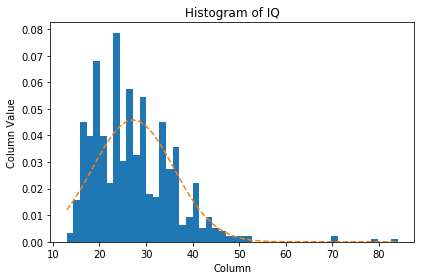


Shapiro-Wilk test for a normal distribution:  (0.9100809097290039, 1.7119159351396122e-19)

Anderson test for a normal distribution:  AndersonResult(statistic=6.60317695040294, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))

Kalmogorov-Smirnov test KstestResult(statistic=0.08846896274660865, pvalue=5.0174228646282515e-05)


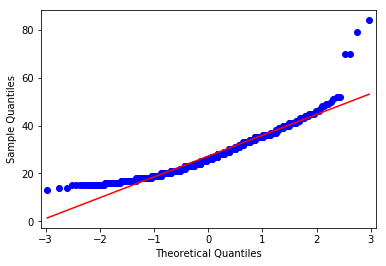


Age  
Mean: 27.236607142857142
Median: 26.0
Mode: 26.0
Max: 84
Min: 13


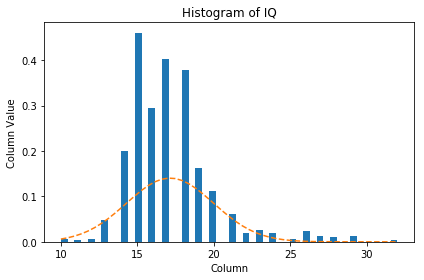


Shapiro-Wilk test for a normal distribution:  (0.8740931153297424, 7.280891436755748e-23)

Anderson test for a normal distribution:  AndersonResult(statistic=11.75214149972021, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))

Kalmogorov-Smirnov test KstestResult(statistic=0.17245068548617126, pvalue=0.0)


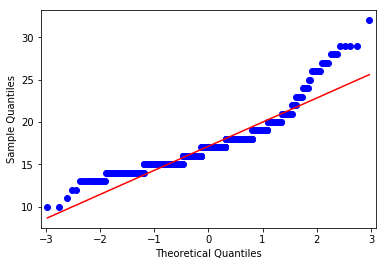


Number of sexual partners  
Mean: 17.136904761904763
Median: 17.0
Mode: 17.0
Max: 32.0
Min: 10.0


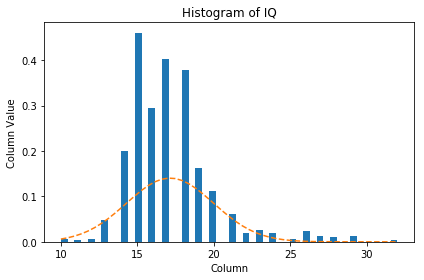


Shapiro-Wilk test for a normal distribution:  (0.8740931153297424, 7.280891436755748e-23)

Anderson test for a normal distribution:  AndersonResult(statistic=11.75214149972021, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))

Kalmogorov-Smirnov test KstestResult(statistic=0.17245068548617126, pvalue=0.0)


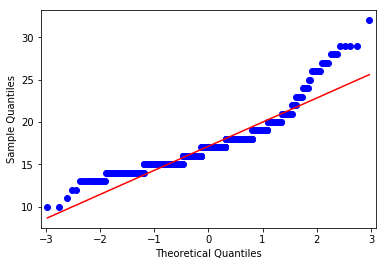


First sexual intercourse  
Mean: 17.136904761904763
Median: 17.0
Mode: 17.0
Max: 32.0
Min: 10.0


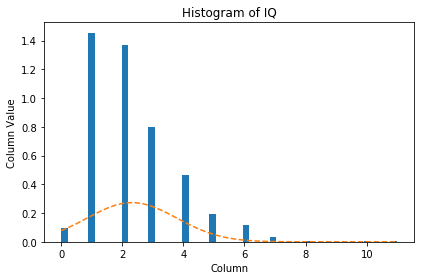


Shapiro-Wilk test for a normal distribution:  (0.8581932783126831, 4.000743973999549e-24)

Anderson test for a normal distribution:  AndersonResult(statistic=27.22830458734734, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))

Kalmogorov-Smirnov test KstestResult(statistic=0.22843057952899626, pvalue=0.0)


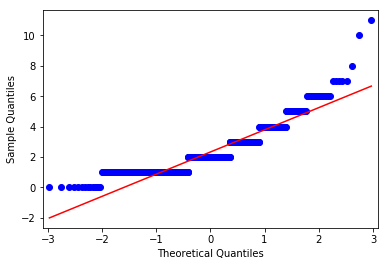


Num of pregnancies  
Mean: 2.3214285714285716
Median: 2.0
Mode: 2.0
Max: 11.0
Min: 0.0

Pearson's coefficients of correlation
                                       Age  Number of sexual partners  \
Age                              1.000000                   0.086485   
Number of sexual partners        0.086485                   1.000000   
First sexual intercourse         0.373065                  -0.149671   
Num of pregnancies               0.562192                   0.097623   
Smokes                           0.056822                   0.233136   
Smokes (years)                   0.226521                   0.157432   
Smokes (packs/year)              0.120146                   0.164598   
Hormonal Contraceptives          0.084845                   0.010774   
Hormonal Contraceptives (years)  0.291472                   0.024612   
IUD                              0.261333                   0.042493   
IUD (years)                      0.207316                   0.008075   

       

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats
import statsmodels.api as sm
import pylab

df = pd.read_csv('cervical_cancer.csv')
query = df.loc[:,:'IUD (years)']

seq = query != '?'
data = query[seq].dropna()

age = data['Age']
sex_n = data['Number of sexual partners']
f_sex = data['First sexual intercourse'] 
n_preg = data['Num of pregnancies']  
smokes = data['Smokes'] 
smokes_y = data['Smokes (years)'] 
smokes_py = data['Smokes (packs/year)'] 
h_contra = data['Hormonal Contraceptives'] 
h_contra_y = data['Hormonal Contraceptives (years)'] 
iud = data['IUD']  
iud_y = data['IUD (years)']

def toNum(col):
    col = pd.to_numeric(col)
    return col

data['Number of sexual partners'] = toNum(age)
data['Number of sexual partners'] = toNum(sex_n)
data['First sexual intercourse'] = toNum(f_sex) 
data['Num of pregnancies'] = toNum(n_preg) 
data['Smokes'] = toNum(smokes)
data['Smokes (years)'] = toNum(smokes_y)
data['Smokes (packs/year)'] = toNum(smokes_py)
data['Hormonal Contraceptives'] = toNum(h_contra)
data['Hormonal Contraceptives (years)'] = toNum(h_contra_y)
data['IUD']  = toNum(iud)
data['IUD (years)'] = toNum(iud_y)

age = data['Age']
sex_n = data['Number of sexual partners']
f_sex = data['First sexual intercourse'] 
n_preg = data['Num of pregnancies']  
smokes = data['Smokes'] 
smokes_y = data['Smokes (years)'] 
smokes_py = data['Smokes (packs/year)'] 
h_contra = data['Hormonal Contraceptives'] 
h_contra_y = data['Hormonal Contraceptives (years)'] 
iud = data['IUD']  
iud_y = data['IUD (years)']

def calc_stats(col):
    drawHist(col)
    col_mean = np.mean(col)
    col_median = np.median(col)
    col_mode = stats.mode(col)
    col_max = np.max(col)
    col_min = np.min(col)
    anderson = stats.anderson(col, dist='logistic')
    shapiro = stats.shapiro(col)
    print('\nShapiro-Wilk test for a normal distribution: ',shapiro)
    print('\nAnderson test for a normal distribution: ',anderson)
    print('\nKalmogorov-Smirnov test',stats.kstest(col, 'norm', args=(col_mean, np.std(col))))
    sm.qqplot(col, loc = col_mean, scale = 3, line='s')
    pylab.show()
    result = f"\nMean: {col_mean}".format(col_mean) + f"\nMedian: {col_median}".format(col_median) + f"\nMode: {col_median}".format(col_mode) + f"\nMax: {col_max}".format(col_max) + f"\nMin: {col_min}".format(col_min)
    return result

def drawHist(x):
    mu = np.mean(x)  # mean of distribution
    sigma = np.std(x)  # standard deviation of distribution
    num_bins = 50
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(x, num_bins, density=1)
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel('Column')
    ax.set_ylabel('Column Value')
    ax.set_title(r'Histogram of IQ')
    fig.tight_layout()
    plt.show()


print("\nAge ",calc_stats(age))
print("\nNumber of sexual partners ",calc_stats(f_sex))
print("\nFirst sexual intercourse ",calc_stats(f_sex))
print("\nNum of pregnancies ",calc_stats(n_preg))

pearson = data.corr(method='pearson')
kendall = data.corr(method='kendall')

print("\nPearson's coefficients of correlation\n",pearson)
print("\nKendall's coefficients of correlation\n",kendall)